 Customer Churn Analysis
Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
#Import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_log_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
#!pip install -U imbalanced-learn
#!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OrdinalEncoder
#import imblearn
from imblearn.over_sampling import SMOTE

In [3]:
#Lets import the Data 
df=pd.read_csv(r'C:/Users/SYS1/Downloads/Telecom_customer_churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the above we can notice that almost al the column values are of catogorical. TotalCharges and Monthly Charge are of numerical datas But DataType of TotalCharges seem to be in Object type. lets check this column first. So convert into numeric datatype and check for any missing values in raw data. 

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can observe most of the columns are of object string type columns

In [10]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

We can observe that most of the columns are Catagorical columns with ony 2 or 3 classes in each columns. Only Monthly charges and Total charges seems to be in numerical format

In [11]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

"Churn is the Target variable" and we can see that there is imbalance. so we need to handle the imbalanced data by sampling methods. 

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Above shows no null value

In [13]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df_eda=df.copy()

In [15]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
#Parameter coerce helps in converting to NaN and the easy to convery NaN values with internal methods
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now again if we check, we have null values after converting to numeric datas. So lets remove the null values and proceed further for data processing and model building.#df['TotalCharges'].fillna(0,inplace=True) #df = df[df['TotalCharges'] !=0]#Remove all 0's 

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

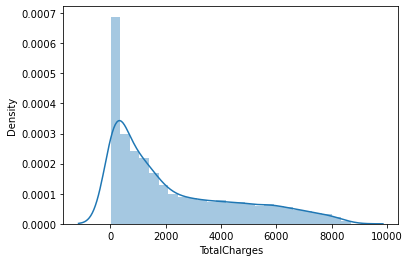

In [17]:
sns.distplot(df['TotalCharges'])

We can observe that there is skewness so let replace null values with median. 

In [18]:
df['TotalCharges'].median()

1397.475

In [20]:
df['TotalCharges']=df['TotalCharges'].fillna((df['TotalCharges'].median()))

In [21]:
df['TotalCharges'].isnull().sum()

0

We can see skewness. So lets not replace with mean as it is not normal distribution. so lets done with median. 

In [22]:
df=df.drop('customerID',axis=1)

CustomerID is not required for Modeling as its not column that could really predict the churn. 

# Ordinal Encoding & Label Encoding:

In [24]:
obj_df=df.select_dtypes(include='O').columns
for col in obj_df:
    print(col,':',df[col].unique())

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Almost all the columns are binary type with Yes or No Option and Male and Female(2 types of classes only) We can also observe
that the columns like 'MultipleLines','onlinesecurity','onlinebackup','Techsupport','StreamingTV','Streamingmovies' which could
be changed as Yes or No only as "No internet service" and "No internet service" and 'No' doesnt mean much difference. Let's change so that we get a cleaner dataset for better analysis. "

In [25]:
df['MultipleLines']=df['MultipleLines'].replace('No Phone Service', 'No')

In [27]:
df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies']] = df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

In [28]:
for col in obj_df:
    print(col,':',df[col].unique())

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Ordinal data: Contract,InternetService Nominal data: All other cloumns with yes,no and Male,Female So lets try to do encoding based on different types of datas. 

In [29]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [30]:
contract_correct_order= ['Month-to-month','One year','Two year']

In [31]:
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder(categories=[contract_correct_order])

In [32]:
ord.fit(df[['Contract']])

OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])

In [33]:
df['Contract']=pd.DataFrame(ord.transform(df[['Contract']]))

In [34]:
df.head()
#pd.set_option('display.max_rows',None)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,0.0,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,1.0,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,0.0,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,1.0,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,0.0,Yes,Electronic check,70.70,151.65,Yes


We can notice that the Ordinal column Contract has been changed and encoded in respective order. Similarly we can do for othet column "InternetService" 

In [35]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [36]:
i_service_correct_order= ['No','DSL','Fiber optic']

In [37]:
ord1 =OrdinalEncoder(categories=[i_service_correct_order])

In [38]:
ord1.fit(df[['InternetService']])

OrdinalEncoder(categories=[['No', 'DSL', 'Fiber optic']])

In [39]:
df['InternetService']=pd.DataFrame(ord1.transform(df[['InternetService']]))

In [40]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,1.0,No,Yes,No,No,No,No,0.0,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,1.0,Yes,No,Yes,No,No,No,1.0,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,1.0,Yes,Yes,No,No,No,No,0.0,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,1.0,Yes,No,Yes,Yes,No,No,1.0,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,2.0,No,No,No,No,No,No,0.0,Yes,Electronic check,70.70,151.65,Yes


InternetService column also have been encoded. From below code we can see that "InternetService" and "Contract" have been changed to float datatypes.good to proceed for model buildings. Now lets encode all other Nominal columns using Label Encoder. 

In [41]:
obj_df = df.select_dtypes(include='O').columns
obj_df

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

In [42]:
LE=LabelEncoder()
for column in obj_df:
    df.loc[:,column] = LE.fit_transform(df.loc[:,column])
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,1.0,0,1,0,0,0,0,0.0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,1.0,1,0,1,0,0,0,1.0,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,1.0,1,1,0,0,0,0,0.0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,1.0,1,0,1,1,0,0,1.0,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,2.0,0,0,0,0,0,0,0.0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,2.0,0,0,1,0,1,1,0.0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,2.0,0,1,0,0,1,0,0.0,1,1,89.10,1949.40,0
7,0,0,0,0,10,0,1,1.0,1,0,0,0,0,0,0.0,0,3,29.75,301.90,0
8,0,0,1,0,28,1,2,2.0,0,0,1,1,1,1,0.0,1,2,104.80,3046.05,1
9,1,0,0,1,62,1,0,1.0,1,1,0,0,0,0,1.0,0,0,56.15,3487.95,0


In [43]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Binning:

In [44]:
#Binning:
bins = [0,9,19,29,39,49,59,69,79,89,99]
labels = [i for i in range(10)]
df['tenure'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

In [45]:
df.tenure.value_counts()

0    1854
1     953
6     832
2     762
5     690
3     653
7     651
4     648
8       0
9       0
Name: tenure, dtype: int64

In [46]:
df['tenure'] = df['tenure'].astype(int)

In [47]:
df['tenure'].dtypes

dtype('int32')

In tenure column we can see that there is large scale between the values to standardise it let do binning and reduct the range limit the classes in cloumns. 

In [48]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,2.843533,0.903166,0.940508,1.222916,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.574329,64.761692,2281.916928,0.265370
std,0.500013,0.368612,0.499748,0.458110,2.453764,0.295752,0.948554,0.778877,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.068104,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,5.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


We can see that we have sucessfully changed or processed the columns which required it. Now the row count fo all columns have been made same. max values of all column have been standardised 

# EDA and Data Visualizations:


Univariate Analysis:

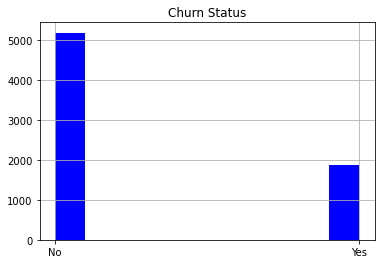

In [49]:
df_eda["Churn"].hist(grid=True,color='blue')
plt.title("Churn Status")
plt.show()

Seems to be Imbalanced dataset. Churn Yes is low in ratio comparision. 

<AxesSubplot:xlabel='gender', ylabel='count'>

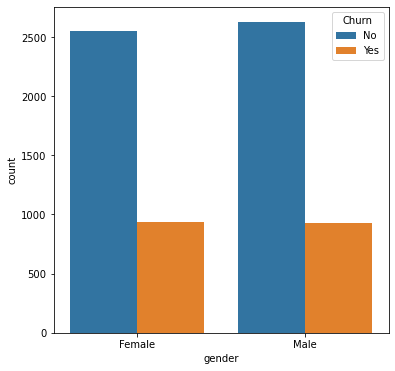

In [50]:
plt.subplots(figsize=(6,6))
sns.countplot(x='gender',data=df_eda,hue='Churn')

 Counts of male and female seems to be with same margin (for both classs of churn). Only a slight count is higher in Males 

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

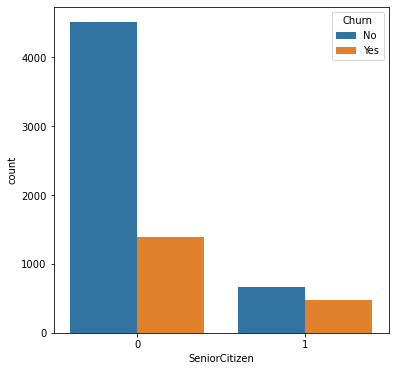

In [51]:
plt.subplots(figsize=(6,6))
sns.countplot(x='SeniorCitizen',data=df_eda,hue='Churn')

 We can see that "seniourCitezens" are less in count and "Churn" Yes is lees with then. 

<AxesSubplot:xlabel='Partner', ylabel='count'>

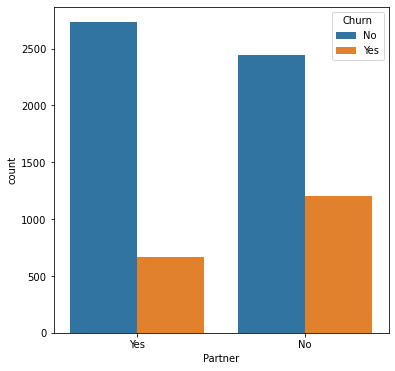

In [52]:
plt.subplots(figsize=(6,6))
sns.countplot(x='Partner',data=df_eda,hue='Churn')

Observation show that Churn is high on those who are not partners. 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

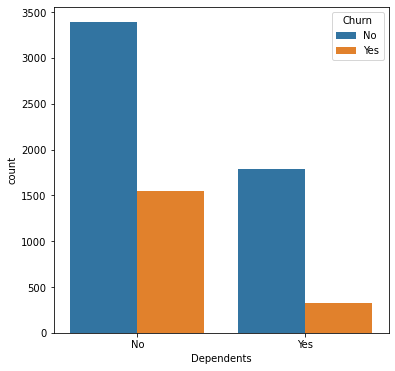

In [53]:
plt.subplots(figsize=(6,6))
sns.countplot(x='Dependents',data=df_eda,hue='Churn')

Non Dependents have higher Churn Yes when compared with Dependent churn yes. 

<AxesSubplot:xlabel='tenure', ylabel='count'>

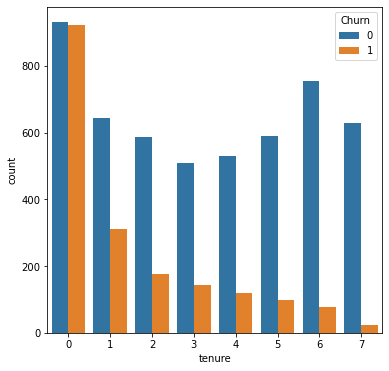

In [54]:
plt.subplots(figsize=(6,6))
sns.countplot(x='tenure',data=df,hue='Churn')

 we can notice that Churn Yes is high in the Tenure between 0-10 less duration limit. Higher the tenure time we have less Churn. 

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

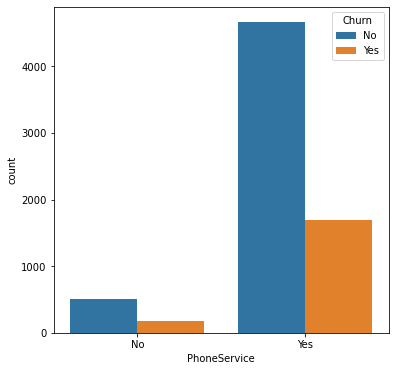

In [55]:
plt.subplots(figsize=(6,6))
sns.countplot(x='PhoneService',data=df_eda,hue='Churn')

count of having Phone service connection is higher with higher no churn and less yes churn 

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

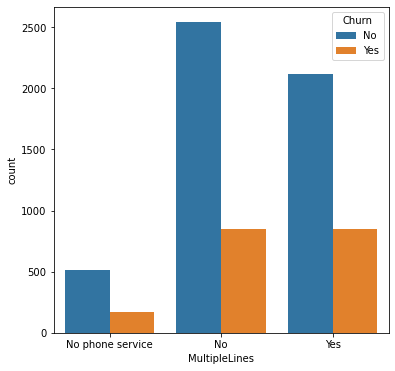

In [56]:
plt.subplots(figsize=(6,6))
sns.countplot(x='MultipleLines',data=df_eda,hue='Churn')

Count of people Not having multiple line is higher. 

<AxesSubplot:xlabel='InternetService', ylabel='count'>

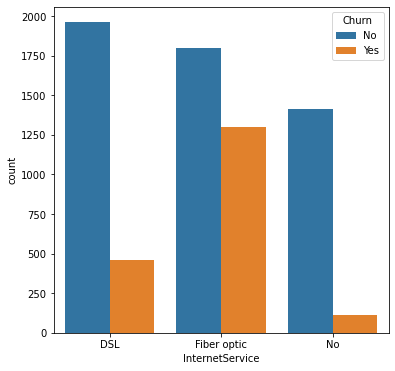

In [58]:
plt.subplots(figsize=(6,6))
sns.countplot(x='InternetService',data=df_eda,hue='Churn')

Graph shows that count of DSL connection is high as compare with Fiber Optic. No internet service count is less and has little yes churn. 

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

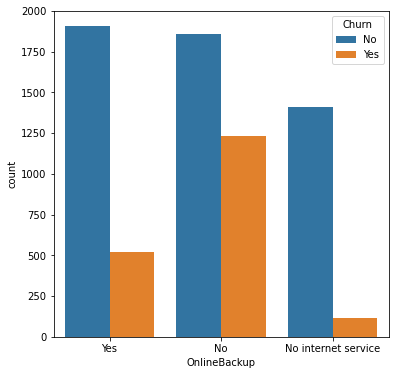

In [59]:
plt.subplots(figsize=(6,6))
sns.countplot(x='OnlineBackup',data=df_eda,hue='Churn')

Counts of Online back up is high compareed with no internet connection. No online backup count has higher Churn Yes rate. 

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

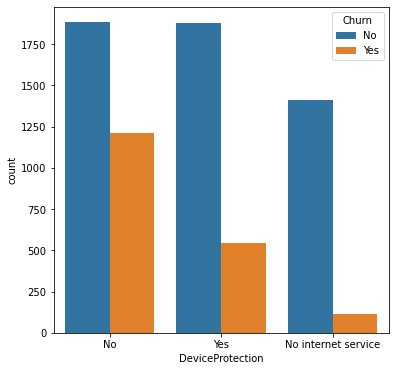

In [60]:
plt.subplots(figsize=(6,6))
sns.countplot(x='DeviceProtection',data=df_eda,hue='Churn')

Device protection count is higherand Churn is less with those for device protection. 

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

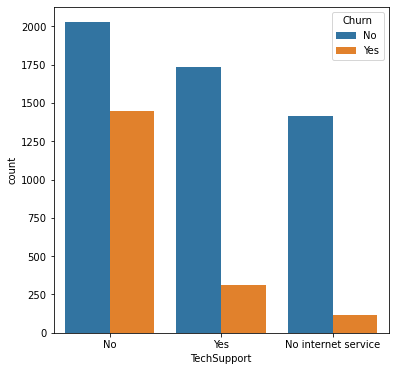

In [61]:
plt.subplots(figsize=(6,6))
sns.countplot(x='TechSupport',data=df_eda,hue='Churn')

Observation: people with TechSupport have less churn yes when compared with the one without tech support. 

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

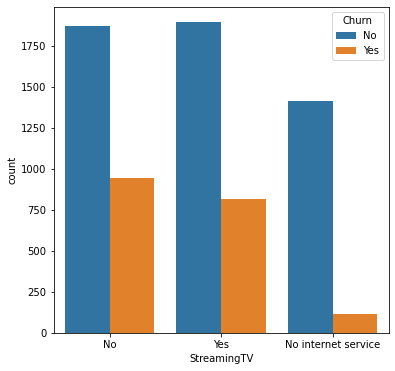

In [62]:
plt.subplots(figsize=(6,6))
sns.countplot(x='StreamingTV',data=df_eda,hue='Churn')

Churn yes is less with the one who is streaming TV 

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

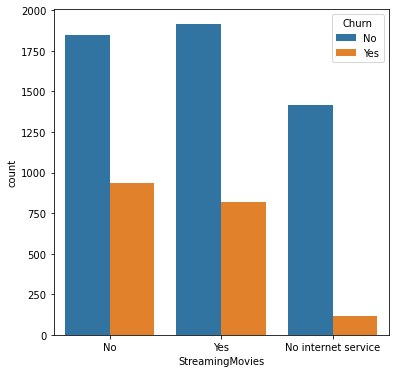

In [63]:
plt.subplots(figsize=(6,6))
sns.countplot(x='StreamingMovies',data=df_eda,hue='Churn')

Observation: Churn yes is less with the one who is streaming Movies 

<AxesSubplot:xlabel='Contract', ylabel='count'>

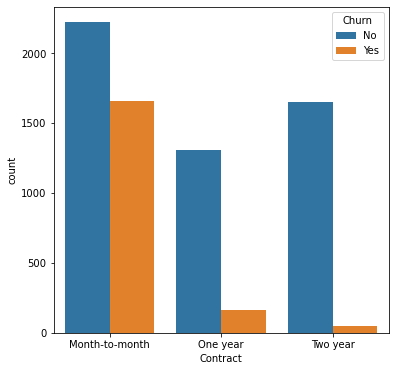

In [64]:
plt.subplots(figsize=(6,6))
sns.countplot(x='Contract',data=df_eda,hue='Churn')

Observation: We can notice that long term contracts are having less churns(yes). Whereas short term contracts with monthly basis is having high churns compared to long term contracts 

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

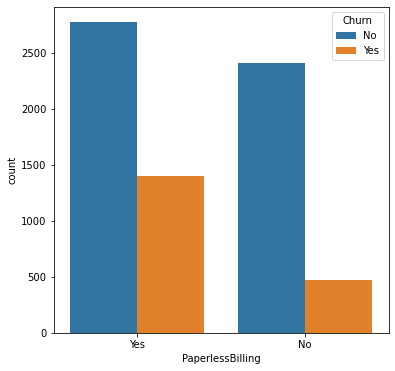

In [65]:
plt.subplots(figsize=(6,6))
sns.countplot(x='PaperlessBilling',data=df_eda,hue='Churn')

Observation: PaperlessBilling is high and Churn in them also is high 

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

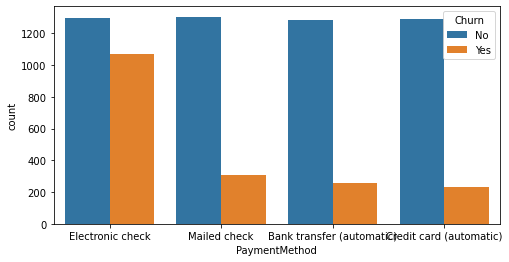

In [67]:
plt.subplots(figsize=(8,4))
sns.countplot(x='PaymentMethod',data=df_eda,hue='Churn')

PaymentMethods seem to be near equal for all type of paymentmode. But high Churn is in Electronic Check modes. 

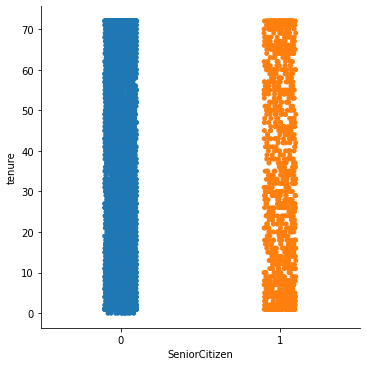

In [68]:
sns.catplot(x='SeniorCitizen',y='tenure',data=df_eda)

When comapred with SeniorCitizens other are of high in count and tenure also densly occupied. 

<AxesSubplot:title={'center':'SeniorCitizens Vs Gender'}, xlabel='gender', ylabel='SeniorCitizen'>

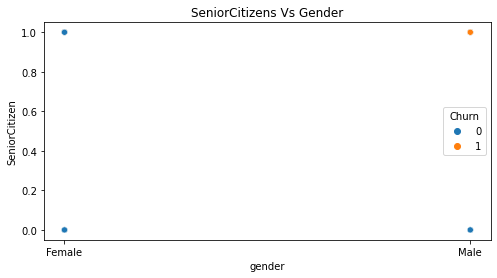

In [69]:
plt.figure(figsize=[8,4])
plt.title('SeniorCitizens Vs Gender')
sns.scatterplot(df_eda['gender'],df_eda['SeniorCitizen'],hue=df['Churn'])

When compared with Female , Males have high Churn(Yes). 

<AxesSubplot:title={'center':'Contract Vs '}, xlabel='Contract', ylabel='gender'>

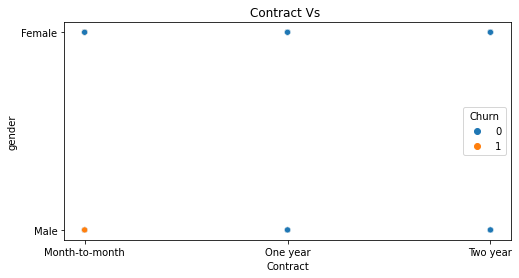

In [70]:
plt.figure(figsize=[8,4])
plt.title('Contract Vs ')
sns.scatterplot(df_eda['Contract'],df_eda['gender'],hue=df['Churn'])

Males with Monthly contracts have high Churn(yes) 

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

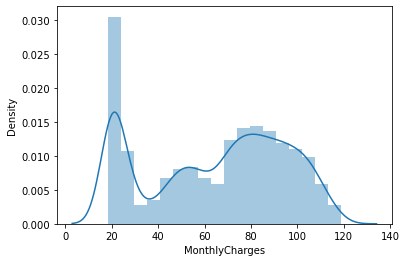

In [71]:
sns.distplot(df["MonthlyCharges"],kde=True)

We can notice that there is skewness in Monthlycharges and point 20 has the higest peak then gets reduced further with increase in next points. 

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

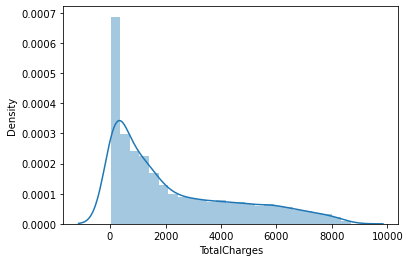

In [72]:
sns.distplot(df["TotalCharges"],kde=True)

We can notice that there is Right tail skewness in total charges with higher amounts. 

# Multivariate Analysis:

In [73]:
corr_mat=df.corr()
corr_mat

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005699,-0.006488,-0.006739,-0.010380,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,0.017352,-0.014569,-0.000002,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.015651,0.008576,0.146185,0.259390,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.038551,0.220173,0.102652,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.376627,0.017706,0.142410,-0.000132,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,-0.154798,0.096848,0.318364,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.156539,-0.001762,-0.024991,-0.179631,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,-0.040292,-0.113890,0.063593,-0.164221
tenure,0.005699,0.015651,0.376627,0.156539,1.000000,0.009645,0.340713,0.031999,0.327205,0.359881,0.359141,0.323959,0.279628,0.284841,0.671135,0.006079,-0.367307,0.246806,0.823763,-0.345556
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.009645,1.000000,-0.020538,0.093720,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004184,0.247398,0.113013,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.340713,-0.020538,1.000000,0.329715,0.131128,0.226910,0.231661,0.134768,0.274823,0.279727,0.110842,0.165146,-0.176793,0.433576,0.452849,0.038037
InternetService,-0.010380,0.259390,-0.000132,-0.179631,0.031999,0.093720,0.329715,1.000000,0.156799,0.307420,0.313603,0.164833,0.429707,0.427264,-0.290189,0.378108,-0.120971,0.905491,0.428301,0.316846
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327205,-0.092893,0.131128,0.156799,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,-0.150100,0.296594,0.412091,-0.171226
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.359881,-0.052312,0.226910,0.307420,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,-0.170898,0.441780,0.509607,-0.082255


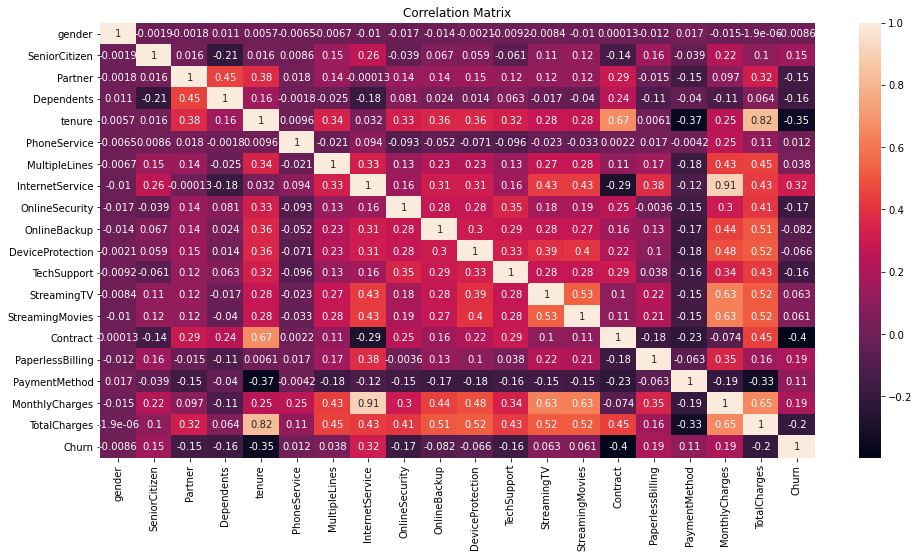

In [74]:
plt.figure(figsize=[16,8])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

Churn has High negative correlation with "tenure" and "Contract". Churn also has slight correlation with "TotalCharges" as wel and further little less correlation with "Partner","Dependents","OnlineSecurity" We can see other intercorrelation with coluns like "PaymentMethod" with almost all other columns 

In [75]:
df.shape

(7043, 20)

# Lets Check Outliers with Box Plot:

gender                 AxesSubplot(0.125,0.536818;0.065678x0.343182)
SeniorCitizen       AxesSubplot(0.203814,0.536818;0.065678x0.343182)
Partner             AxesSubplot(0.282627,0.536818;0.065678x0.343182)
Dependents          AxesSubplot(0.361441,0.536818;0.065678x0.343182)
tenure              AxesSubplot(0.440254,0.536818;0.065678x0.343182)
PhoneService        AxesSubplot(0.519068,0.536818;0.065678x0.343182)
MultipleLines       AxesSubplot(0.597881,0.536818;0.065678x0.343182)
InternetService     AxesSubplot(0.676695,0.536818;0.065678x0.343182)
OnlineSecurity      AxesSubplot(0.755508,0.536818;0.065678x0.343182)
OnlineBackup        AxesSubplot(0.834322,0.536818;0.065678x0.343182)
DeviceProtection          AxesSubplot(0.125,0.125;0.065678x0.343182)
TechSupport            AxesSubplot(0.203814,0.125;0.065678x0.343182)
StreamingTV            AxesSubplot(0.282627,0.125;0.065678x0.343182)
StreamingMovies        AxesSubplot(0.361441,0.125;0.065678x0.343182)
Contract               AxesSubplot

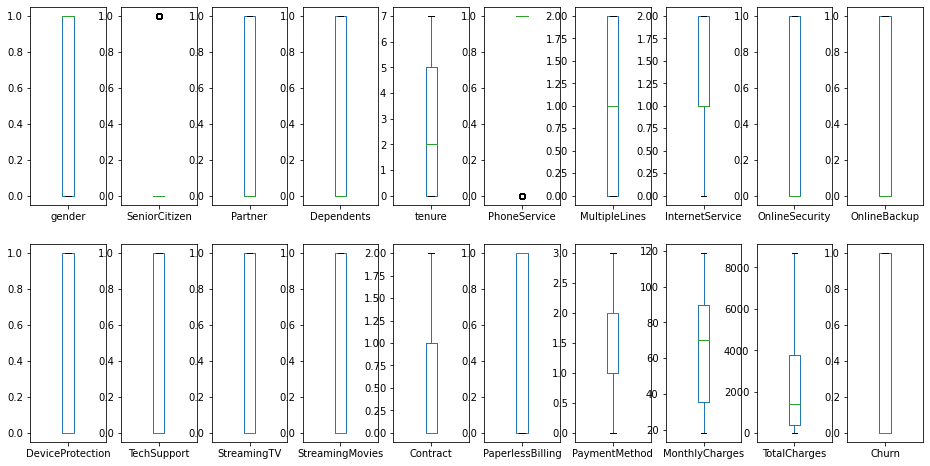

In [76]:
df.plot(kind='box',subplots=True,layout=(2,10),figsize=[16,8])

Nothing much of outliers in the data from above plot 

# Lets check for Skewness:

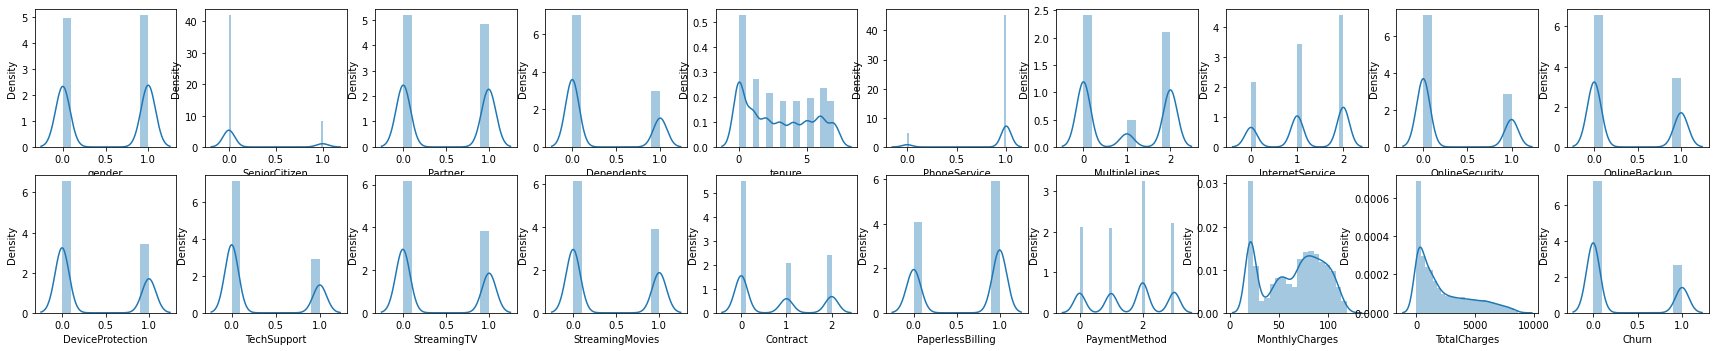

In [77]:
collist=df.columns.values
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(10,10,i+1)
    sns.distplot(df[collist[i]])

Observation shows that skewness is there in almost all the columns. 

# Outlier Removal:

In [78]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_zscore=df[(z<3).all(axis=1)]

In [79]:
df.shape

(7043, 20)

In [80]:
df_zscore.shape

(6361, 20)

In [81]:
((7043-6361)/7043)*100

9.683373562402386

We can notice that there is a big data loss for this small dataset for about 10%. so lets not remove the outliers and proceed with the previous processed datset 

In [82]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.305564
PhoneService       -2.727153
MultipleLines       0.118719
InternetService    -0.410327
OnlineSecurity      0.943722
OnlineBackup        0.652817
DeviceProtection    0.657450
TechSupport         0.924630
StreamingTV         0.475581
StreamingMovies     0.460199
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963789
Churn               1.063031
dtype: float64

Above ode is used to check skewness in columns and we could notice that there is skewness some columns. So lets try to remove it in below steps. 

# Skewness Removal:

In [83]:
x1=df.drop("Churn",axis=1)
y1=df["Churn"]

In [84]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x1)
df_skew=pd.DataFrame(df_skew,columns=x1.columns)

 We have used power transformation to reduce the skewness in above code block 

In [85]:
x1=df_skew

In [86]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x1 = scaler.fit_transform(x1)

In [87]:
ms=MinMaxScaler()
ms.fit(df_skew)
x1=ms.transform(df_skew)
x1=pd.DataFrame(x1,columns=df_skew.columns)

we have used MinMax Scaler in order to handle the scaling issues between different columns in above code block. 

# Balancing of Imbalanced data and Standardisation:

In [88]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

As we mentioned in start we have imbalenced data.So we nee to balance it before applying in model building. Or else we will not get good accuracy. So lets proceed with OverSampling as it will not cut down any data or data loss will not be there. So let do sampling with OverSampling for the lower count class in Target variable. 

# Over Sampling

In [89]:
from imblearn.over_sampling import RandomOverSampler

In [90]:
random_over_sampler = RandomOverSampler()

In [91]:
x,y=random_over_sampler.fit_resample(x1,y1)

In [92]:
x.shape , y.shape

((10348, 19), (10348,))

# Checking for best Random State:

In [93]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=i)
    lr=RandomForestClassifier()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is  "  ,maxAccu , "  at random_state:", maxRS)

Best accuracy is   0.9068950373298199   at random_state: 100


We have check the best Random state with the above code bolck. The best score is 90% was with Randomstate: 28 

# Model Building:

In [94]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=maxRS)

In [95]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(f1_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8748792270531401
0.882858435097241
[[835 217]
 [ 42 976]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.87      1052
           1       0.82      0.96      0.88      1018

    accuracy                           0.87      2070
   macro avg       0.89      0.88      0.87      2070
weighted avg       0.89      0.87      0.87      2070



In [96]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(f1_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9096618357487922
0.9136258660508083
[[894 158]
 [ 29 989]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1052
           1       0.86      0.97      0.91      1018

    accuracy                           0.91      2070
   macro avg       0.92      0.91      0.91      2070
weighted avg       0.92      0.91      0.91      2070



In [97]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7657004830917874
[[768 284]
 [201 817]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1052
           1       0.74      0.80      0.77      1018

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



In [98]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print(accuracy_score(y_test,predab))
print(confusion_matrix(y_test,predab))
print(classification_report(y_test,predab))

0.7879227053140097
[[783 269]
 [170 848]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1052
           1       0.76      0.83      0.79      1018

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



In [99]:
svc=SVC()
svc.fit(x_train,y_train)
predsv=svc.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.7913043478260869
[[789 263]
 [169 849]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.79      1052
           1       0.76      0.83      0.80      1018

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



In [100]:
scr=cross_val_score(dt,x,y,cv=5,scoring='f1')
print("Cross Validation Score of DecisionTree Model is : ", scr.mean())

Cross Validation Score of DecisionTree Model is :  0.8868021855483299


In [101]:
scr=cross_val_score(rf,x,y,cv=5,scoring='f1')
print("Cross Validation Score of RandomForest Model is : ", scr.mean())

Cross Validation Score of RandomForest Model is :  0.9099680533568819


In [102]:
scr=cross_val_score(svc,x,y,cv=5,scoring='f1')
print("Cross Validation Score of Support Vector Model is : ", scr.mean())

Cross Validation Score of Support Vector Model is :  0.7878141770564993


In [103]:
scr=cross_val_score(gnb,x,y,cv=5,scoring='f1')
print("Cross Validation Score of GussianNB Model is : ", scr.mean())

Cross Validation Score of GussianNB Model is :  0.7635733094993118


In [104]:
scr=cross_val_score(ab,x,y,cv=5,scoring='f1')
print("Cross Validation Score of AdaBoost Model is : ", scr.mean())

Cross Validation Score of AdaBoost Model is :  0.7836888272986688


MODEL Accuracy F1_Score CrossValidation Difference DT 88 0.88 0.8878 -0.0078 RF 91 0.91 0.9077 0.0023 GNB 77 0.77 0.7875 -0.0175 ADB 78 0.78 0.7672 0.0128 SVC 79 0.79 0.7809 0.0091 Observation: The above table observation shows that the minimum difference (F1_score and CV) is with RandomForestClassifier. So lets perform further Parameter tuning with that RF model. Also we can see there is small difference only with other models too so lets check whats the performance with other models too. 

# 1st Parameter Tuning:

RandomForestClassifier

In [105]:
#parameters={'max_depth': np.arange(2,10),'criterion': ['gini','entropy']}
parameters ={
              "bootstrap": [True,False],
              "criterion" : ["gini", "entropy"],              
             }

In [106]:
gcv=GridSearchCV(RandomForestClassifier(), parameters,cv=5) #Tuning RandomForestClassifier

In [107]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy']})

In [108]:
gcv.best_params_

{'bootstrap': False, 'criterion': 'entropy'}

In [109]:
mod=RandomForestClassifier(bootstrap='False',criterion='gini')
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(f1_score(y_test,pred)*100)

90.53308823529412


Decision Tree Classifier

In [110]:
#from scipy.stats import randint
#param_dist = {"max_depth": [3, None],"max_features": randint(1, 9),"min_samples_leaf": randint(1, 9),"criterion": ["gini", "entropy"]}
parameters ={"criterion" : ["gini", "entropy"]}

In [111]:
gcv=GridSearchCV(DecisionTreeClassifier(), parameters,cv=5) #Tuning DecisionTreeClassifier

In [112]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})

In [113]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})

In [114]:
mod2=DecisionTreeClassifier(criterion='entropy',random_state=maxRS)
mod2.fit(x_train,y_train)
pred=mod2.predict(x_test)
print(f1_score(y_test,pred)*100)

87.5840430300314


3rd Parameter Tuning:

SVC Model

In [115]:
parameters = {'C': [1, 10, 100],'kernel':['poly','rbf','sigmoid']}

In [116]:
gcv=GridSearchCV(SVC(), parameters,cv=5) #Tuning svc

In [117]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [118]:
gcv.best_params_

{'C': 100, 'kernel': 'rbf'}

In [ ]:
mod3=SVC(C=100,gamma=0.1,kernel='rbf',random_state=maxRS)
mod3.fit(x_train,y_train)
pred=mod3.predict(x_test)
print(f1_score(y_test,pred)*100)

# After parameter tuning ,We have got 92% accuracy from RandomForestClassifier model.Hence it would be the best model to proceed for Prediction.
Lets Check with AUC-ROC curve:


In [119]:
from sklearn.metrics import plot_roc_curve

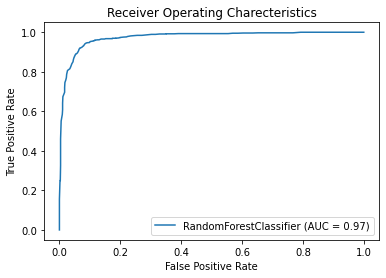

In [120]:
plot_roc_curve(mod,x_test,y_test)
plt.title('Receiver Operating Charecteristics')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

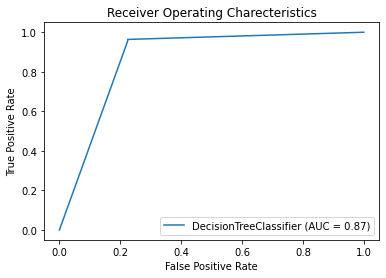

In [121]:
plot_roc_curve(mod2,x_test,y_test)
plt.title('Receiver Operating Charecteristics')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [122]:
plot_roc_curve(mod3,x_test,y_test)
plt.title('Receiver Operating Charecteristics')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

NameError: name 'mod3' is not defined

Observation: Seems to be almost 97% with RandomForest model in AUC-ROC plot which is best percentage score.

# Saving the Model:

In [123]:
import joblib
joblib.dump(mod,"Churn.pkl")

['Churn.pkl']

In [124]:
mod=joblib.load("Churn.pkl")

In [125]:
prediction=mod.predict(x_test)

In [126]:
print(f1_score(y_test,prediction)*100)

90.53308823529412


Observation: We have save and loaded in above codes and checked for the accuracy too. 

In [127]:
prediction=pd.DataFrame(prediction) #Converting into Dataframe

In [128]:
prediction.to_csv('Churn.csv') #Saving the predictions

In [129]:
prediction

,0
0,1
1,1
2,1
3,1
4,1
...,...
2065,0
2066,0
2067,1
2068,1


# Summary and Observation:

Hence we have Saved the model and Checked by loading whether its working fine. and checked with predicting.